This scrypt plots the median tone of the articles over time by day

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pyspark
from pyspark.sql import *

/home/karna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
DATA_PATH = "../../data/from_cluster/"

In [4]:
spark = SparkSession.builder.getOrCreate()

In [8]:
tones_df = spark.read.parquet(DATA_PATH  + "tone_mean_count_5themes_median.parquet")

In [9]:
tones = tones_df.toPandas()

In [10]:
tones.head()

,day,month,year,median_tone
0,3.0,4.0,2015.0,-2.20
1,5.0,11.0,2016.0,-2.03
2,7.0,7.0,2017.0,-2.18
3,8.0,6.0,2015.0,-1.83
4,10.0,5.0,2016.0,-2.00


In [11]:
tones['datetime'] = pd.to_datetime(tones[['year','month','day']])

In [12]:
tones = tones.sort_values(by='datetime') 

We have now a table with the median tone for each day. Let's plot the median tone over time.

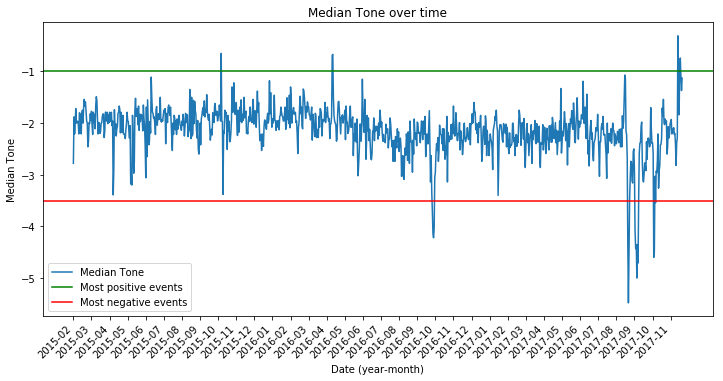

In [18]:
ax = tones.plot('datetime','median_tone',figsize=(12,6), label="Median Tone")
# display a label every month
ticks = tones.datetime.values[0::30]
labels = [str(t).split('-')[0] + "-" + str(t).split('-')[1] for t in ticks]
plt.xticks(ticks, labels, rotation=45)
plt.xlabel("Date (year-month)")
plt.ylabel("Median Tone")
plt.title("Median Tone over time")
plt.axhline(y=-1, color='g',label="Most positive events")
plt.axhline(y=-3.5, color='red', label="Most negative events")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [14]:
tones.head()

,day,month,year,median_tone,datetime
912,18.0,2.0,2015.0,-2.78,2015-02-18
435,19.0,2.0,2015.0,-1.88,2015-02-19
722,20.0,2.0,2015.0,-2.21,2015-02-20
592,21.0,2.0,2015.0,-2.00,2015-02-21
65,22.0,2.0,2015.0,-1.72,2015-02-22


In [21]:
tones[(tones['median_tone']>-1) & (tones['median_tone']!=0)]

,day,month,year,median_tone,datetime
905,21.0,10.0,2015.0,-0.65,2015-10-21
527,22.0,4.0,2016.0,-0.69,2016-04-22
134,23.0,4.0,2016.0,-0.67,2016-04-23
650,16.0,11.0,2017.0,-0.31,2017-11-16
904,19.0,11.0,2017.0,-0.96,2017-11-19
827,20.0,11.0,2017.0,-0.74,2017-11-20


In [20]:
tones[tones['median_tone']<-3.5]

,day,month,year,median_tone,datetime
937,5.0,10.0,2016.0,-3.70,2016-10-05
852,6.0,10.0,2016.0,-4.14,2016-10-06
342,7.0,10.0,2016.0,-4.22,2016-10-07
866,8.0,10.0,2016.0,-4.04,2016-10-08
274,25.0,8.0,2017.0,-4.35,2017-08-25
750,26.0,8.0,2017.0,-5.48,2017-08-26
764,27.0,8.0,2017.0,-4.50,2017-08-27
336,6.0,9.0,2017.0,-4.08,2017-09-06
14,7.0,9.0,2017.0,-4.43,2017-09-07
572,8.0,9.0,2017.0,-4.36,2017-09-08
